In [1]:
import sys
sys.path.insert(0, '../')
from lib import *

%matplotlib inline
DEBUG=False

## Dummy example 

In [2]:
# path ="/media/rodrigoa/2Gb/data/SBND_XA_PDE/SBND_XA_VIS/joython/"
path="/media/rodrigoa/DiscoDuro/SBND_XA_PDE/APSAIA_VIS/joython/"

for run in range(6,7):
    if run==3:continue # Rodrigo forgot one run :D
    Run_props=open_run_properties(run,"../macros/APSAIA_VUV.xlsx")
    run_path=path+"run"+str(run).zfill(2)+"/";

    compress=False
    Pedestal_vars=open_run_var(run_path,"Pedestal_vars",Run_props["Channels"],compressed=compress)
    Peak_vars    =open_run_var(run_path,"Peak_vars"    ,Run_props["Channels"],compressed=compress)

peak_cut=VARsAsDataFrame((Peak_vars,));


----------
Doing:  substract_Pedestal  on channel: 0
(29972,) (30001,)
(29972, 5000) (30001, 5000)
----------
Doing:  compute_AverageWaveforms  on channel: 0
AvWvf
AvWvf_Center_Peak
AvWvf_Center_Rise


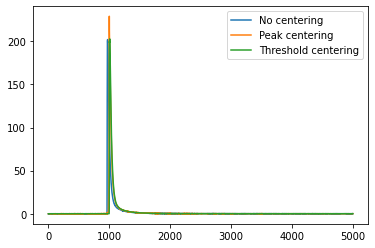

In [7]:
for run in range(6,7):
    RawADC=open_run_var(run_path,"RawADC",[0],compressed=True)
    ADC=do_run_things((RawADC,Pedestal_vars,Run_props["Polarity"]),substract_Pedestal)
    
    cutted_Peak_vars=Apply_cut_to_VAR(peak_cut["PeakTime"]>925,Peak_vars)
    cutted_ADC      =Apply_cut_to_VAR(peak_cut["PeakTime"]>925,ADC   )
    print(cutted_Peak_vars[0]["PeakTime"].shape ,Peak_vars[0]["PeakTime"].shape)
    print(cutted_ADC      [0]            .shape ,ADC      [0]            .shape)
    del RawADC

# Dummy example

Avg_wvf=do_run_things((
                       Apply_cut_to_VAR(peak_cut["PeakTime"]>925,ADC   ),
                       Apply_cut_to_VAR(peak_cut["PeakTime"]>925,Peak_vars),
                       ),compute_AverageWaveforms)
del ADC
for alg in Avg_wvf[0]:
    print (alg)
    plt.plot(Avg_wvf[0][alg])
plt.legend(["No centering","Peak centering","Threshold centering"])


## WVF Comparison

----------
Doing:  substract_Pedestal  on channel: 0
Doing:  substract_Pedestal  on channel: 1
Doing:  substract_Pedestal  on channel: 3
Doing:  substract_Pedestal  on channel: 4
Cut in ch 4 : (30001, 5000) (28695, 5000)
Cut in ch 0 : (30001,) (29598,)
Cut in ch 1 : (30001,) (29628,)
Cut in ch 3 : (30001,) (28488,)
Cut in ch 4 : (30001,) (28695,)
Cut in ch 5 : (30001,) (2734,)
----------
Doing:  compute_AverageWaveforms  on channel: 0
Doing:  compute_AverageWaveforms  on channel: 1
Doing:  compute_AverageWaveforms  on channel: 3
Doing:  compute_AverageWaveforms  on channel: 4
AvWvf
AvWvf_Center_Peak
AvWvf_Center_Rise


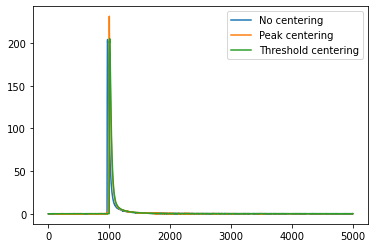

In [2]:
week="APSAIA_VIS"
# path ="/media/rodrigoa/2Gb/data/SBND_XA_PDE/SBND_XA_VIS/joython/"
path="/media/rodrigoa/DiscoDuro/SBND_XA_PDE/"+week+"/joython/"

for run in range(6,7):
    if run==3:continue # Rodrigo forgot one run :D
    Run_props=open_run_properties(run,"../macros/APSAIA_VUV.xlsx")
    run_path=path+"run"+str(run).zfill(2)+"/";

    compress=False
    Pedestal_vars=open_run_var(run_path,"Pedestal_vars",Run_props["Channels"],compressed=compress)
    Peak_vars    =open_run_var(run_path,"Peak_vars"    ,Run_props["Channels"],compressed=compress)


    RawADC=open_run_var(run_path,"RawADC",[0,1,3,4],compressed=True)
    ADC=do_run_things((RawADC,Pedestal_vars,Run_props["Polarity"]),substract_Pedestal)
    
    peak_cut=VARsAsDataFrame((Peak_vars,));

    del RawADC

# Dummy example

Avg_wvf=do_run_things((
                       Apply_cut_to_VAR((peak_cut["PeakTime"]>925)*(peak_cut["Peak"]>50),ADC   ),
                       Apply_cut_to_VAR((peak_cut["PeakTime"]>925)*(peak_cut["Peak"]>50),Peak_vars),
                       ),compute_AverageWaveforms)
del ADC
for alg in Avg_wvf[0]:
    print (alg)
    plt.plot(Avg_wvf[0][alg])
plt.legend(["No centering","Peak centering","Threshold centering"])



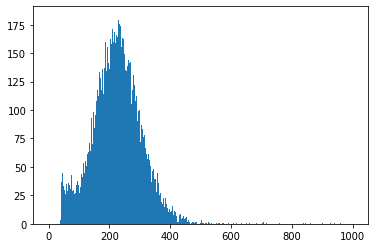

In [21]:
plt.hist(peak_cut["Peak"][0],1000,[0,1000]);